In [1]:
#Problem Statement:Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [2]:
import pandas as pd
import numpy as np
from datetime import  datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df= pd.read_excel(r'E:\Data Science Course\Data Science Assignment\Forcasting\Airlines+Data.xlsx')

In [3]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
import datetime

In [6]:
df["month"] = df.Month.dt.strftime("%b")

In [8]:
df["year"] = df.Month.dt.strftime("%Y")

In [10]:
df= df.set_index(['Month'])

In [11]:
df

,Passengers,month,year
Month,,,
1995-01-01,112,Jan,1995
1995-02-01,118,Feb,1995
1995-03-01,132,Mar,1995
1995-04-01,129,Apr,1995
1995-05-01,121,May,1995
...,...,...,...
2002-08-01,405,Aug,2002
2002-09-01,355,Sep,2002
2002-10-01,306,Oct,2002


<AxesSubplot:xlabel='year'>

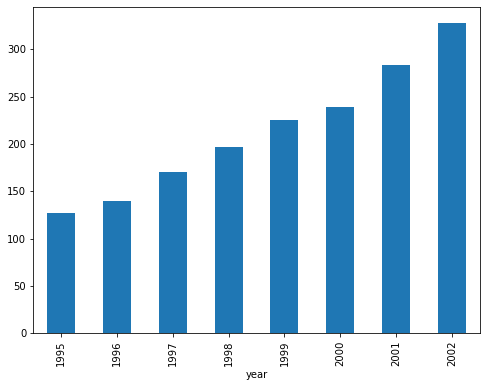

In [11]:
plt.figure(figsize=(8,6))
df.groupby('year')['Passengers'].mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

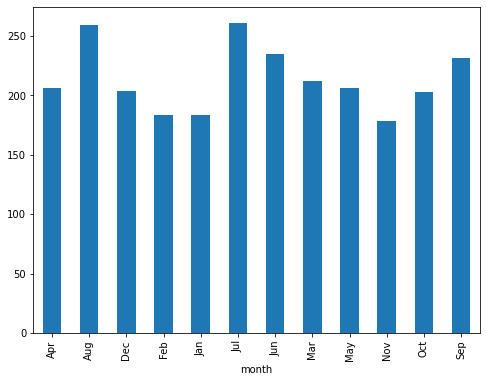

In [12]:
plt.figure(figsize=(8,6))
df.groupby('month')['Passengers'].mean().plot(kind='bar')

<AxesSubplot:xlabel='month'>

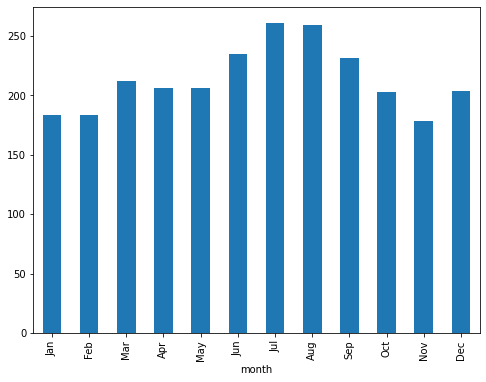

In [13]:
#plt.figure(figsize=(8,6))
#df.groupby('month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')

Text(0, 0.5, 'No of pasengers')

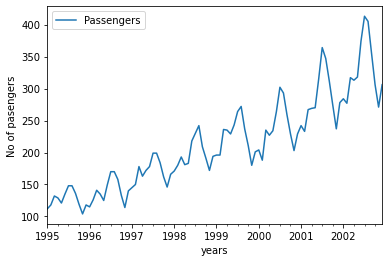

In [13]:
#plt.figure(figsize=(10,8))
df.plot()
plt.xlabel('years')
plt.ylabel('No of pasengers')

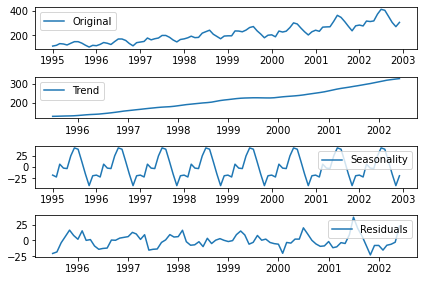

In [15]:
decomposition = seasonal_decompose(df['Passengers']) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df['Passengers'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

In [16]:
monthly= pd.pivot_table(values='Passengers' ,data=df,index='month',columns='year')

In [17]:
monthly

year,1995,1996,1997,1998,1999,2000,2001,2002
month,,,,,,,,
Apr,129,135,163,181,235,227,269,313
Aug,148,170,199,242,272,293,347,405
Dec,118,140,166,194,201,229,278,306
Feb,118,126,150,180,196,188,233,277
Jan,112,115,145,171,196,204,242,284
Jul,148,170,199,230,264,302,364,413
Jun,135,149,178,218,243,264,315,374
Mar,132,141,178,193,236,235,267,317
May,121,125,172,183,229,234,270,318


<AxesSubplot:xlabel='month'>

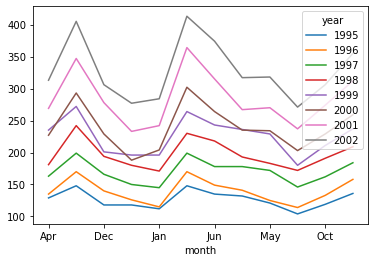

In [18]:
monthly.plot()

<AxesSubplot:xlabel='month', ylabel='Passengers'>

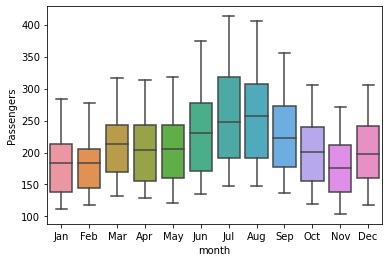

In [19]:
#Box plots
sns.boxplot(x="month",y="Passengers",data=df)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

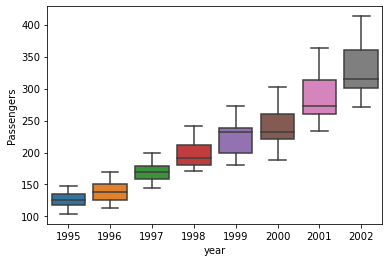

In [20]:
sns.boxplot(x="year",y="Passengers",data=df)

In [21]:
df_tran=df.copy()

In [22]:
df_tran['t']= np.arange(1,97)

In [23]:
df_tran['log']= np.log(df['Passengers']) #log transform of data

In [24]:
df_tran['t_sq']= df['Passengers']*df['Passengers'] # taking sq

In [25]:
df_tran

,Passengers,month,year,t,log,t_sq
Month,,,,,,
1995-01-01,112,Jan,1995,1,4.718499,12544
1995-02-01,118,Feb,1995,2,4.770685,13924
1995-03-01,132,Mar,1995,3,4.882802,17424
1995-04-01,129,Apr,1995,4,4.859812,16641
1995-05-01,121,May,1995,5,4.795791,14641
...,...,...,...,...,...,...
2002-08-01,405,Aug,2002,92,6.003887,164025
2002-09-01,355,Sep,2002,93,5.872118,126025
2002-10-01,306,Oct,2002,94,5.723585,93636


# Spliting Data

In [26]:
train= df_tran.head(int(len(df_tran['Passengers'])*0.7))

In [27]:
train

,Passengers,month,year,t,log,t_sq
Month,,,,,,
1995-01-01,112,Jan,1995,1,4.718499,12544
1995-02-01,118,Feb,1995,2,4.770685,13924
1995-03-01,132,Mar,1995,3,4.882802,17424
1995-04-01,129,Apr,1995,4,4.859812,16641
1995-05-01,121,May,1995,5,4.795791,14641
...,...,...,...,...,...,...
2000-03-01,235,Mar,2000,63,5.459586,55225
2000-04-01,227,Apr,2000,64,5.424950,51529
2000-05-01,234,May,2000,65,5.455321,54756


In [28]:
test= df_tran.tail(int(len(df_tran['Passengers'])-len(train)))

In [29]:
test

,Passengers,month,year,t,log,t_sq
Month,,,,,,
2000-08-01,293,Aug,2000,68,5.680173,85849
2000-09-01,259,Sep,2000,69,5.556828,67081
2000-10-01,229,Oct,2000,70,5.433722,52441
2000-11-01,203,Nov,2000,71,5.313206,41209
2000-12-01,229,Dec,2000,72,5.433722,52441
2001-01-01,242,Jan,2001,73,5.488938,58564
2001-02-01,233,Feb,2001,74,5.451038,54289
2001-03-01,267,Mar,2001,75,5.587249,71289
2001-04-01,269,Apr,2001,76,5.594711,72361


# Model building

In [30]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.56251704229223

In [31]:
print('predicted data')
pred_linear.head(10)

predicted data


Month
2000-08-01    247.789688
2000-09-01    249.829156
2000-10-01    251.868625
2000-11-01    253.908093
2000-12-01    255.947562
2001-01-01    257.987030
2001-02-01    260.026499
2001-03-01    262.065967
2001-04-01    264.105435
2001-05-01    266.144904
dtype: float64

In [32]:

print('original data')
test['Passengers'].head(10)

original data


Month
2000-08-01    293
2000-09-01    259
2000-10-01    229
2000-11-01    203
2000-12-01    229
2001-01-01    242
2001-02-01    233
2001-03-01    267
2001-04-01    269
2001-05-01    270
Name: Passengers, dtype: int64

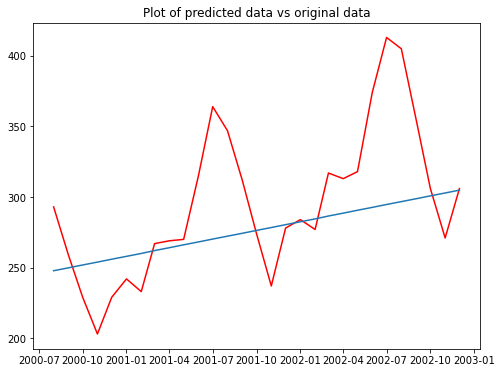

In [33]:

plt.figure(figsize=(8,6))
plt.title('Plot of predicted data vs original data')
plt.plot(test['Passengers'],color='r')
plt.plot(pred_linear, )

In [35]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sq',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

37.02470119391693

In [36]:
print('predicted data')
pred_Quad.head(10)

predicted data


Month
2000-08-01    309.135804
2000-09-01    265.994891
2000-10-01    232.410205
2000-11-01    206.714962
2000-12-01    233.023371
2001-01-01    247.504561
2001-02-01    237.914616
2001-03-01    277.575815
2001-04-01    280.364054
2001-05-01    281.918410
dtype: float64

In [37]:
print('original data')
test['Passengers'].head(10)

original data


Month
2000-08-01    293
2000-09-01    259
2000-10-01    229
2000-11-01    203
2000-12-01    229
2001-01-01    242
2001-02-01    233
2001-03-01    267
2001-04-01    269
2001-05-01    270
Name: Passengers, dtype: int64

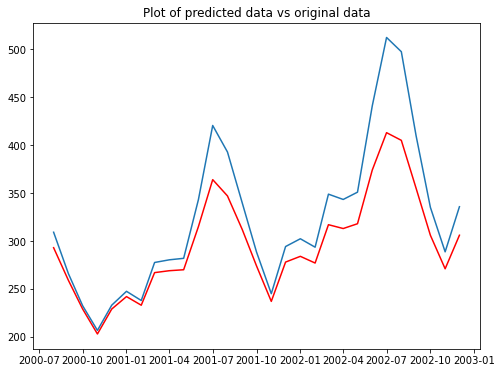

In [38]:
plt.figure(figsize=(8,6))
plt.title('Plot of predicted data vs original data')
plt.plot(test['Passengers'],color='r')
plt.plot(pred_Quad, )

In [39]:
#log transformation 
log_model = smf.ols('log~t',data=train).fit()
pred_log = pd.Series(log_model.predict(test[["t"]]))
rmse_log = np.sqrt(np.mean((np.array(test['log'])-np.array(pred_log))**2))
rmse_log

0.14077983769597405

In [40]:
print('predicted data')
pred_log.head(10)

predicted data


Month
2000-08-01    5.546294
2000-09-01    5.557887
2000-10-01    5.569480
2000-11-01    5.581073
2000-12-01    5.592666
2001-01-01    5.604259
2001-02-01    5.615852
2001-03-01    5.627445
2001-04-01    5.639038
2001-05-01    5.650631
dtype: float64

In [41]:
print('original data')
test['log'].head(10)

original data


Month
2000-08-01    5.680173
2000-09-01    5.556828
2000-10-01    5.433722
2000-11-01    5.313206
2000-12-01    5.433722
2001-01-01    5.488938
2001-02-01    5.451038
2001-03-01    5.587249
2001-04-01    5.594711
2001-05-01    5.598422
Name: log, dtype: float64

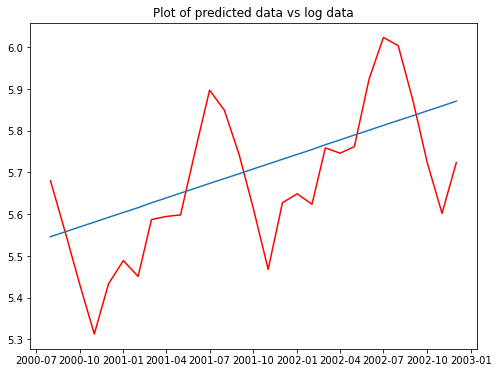

In [42]:
plt.figure(figsize=(8,6))
plt.title('Plot of predicted data vs log data')
plt.plot(test['log'],color='r')
plt.plot(pred_log, )

In [43]:
#log with sq
log_sq_model = smf.ols('log~t+t_sq',data=train).fit()
pred_log_sq = pd.Series(log_sq_model.predict(test[["t",'t_sq']]))
rmse_log_sq = np.sqrt(np.mean((np.array(test['log'])-np.array(pred_log_sq))**2))
rmse_log_sq

0.3314728391859791

In [44]:
print('predicted data')
pred_log_sq.head(10)

predicted data


Month
2000-08-01    5.841254
2000-09-01    5.635614
2000-10-01    5.475922
2000-11-01    5.354163
2000-12-01    5.482444
2001-01-01    5.553858
2001-02-01    5.509536
2001-03-01    5.702019
2001-04-01    5.717212
2001-05-01    5.726472
dtype: float64

In [45]:
print('original data')
test['log'].head(10)

original data


Month
2000-08-01    5.680173
2000-09-01    5.556828
2000-10-01    5.433722
2000-11-01    5.313206
2000-12-01    5.433722
2001-01-01    5.488938
2001-02-01    5.451038
2001-03-01    5.587249
2001-04-01    5.594711
2001-05-01    5.598422
Name: log, dtype: float64

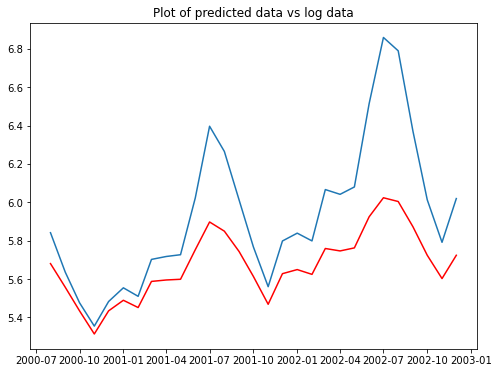

In [47]:
plt.figure(figsize=(8,6))
plt.title('Plot of predicted data vs log data')
plt.plot(test['log'],color='r')
plt.plot(pred_log_sq, )

In [48]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Quad","rmse_log","rmse_log_sq"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Quad,rmse_log,rmse_log_sq])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_log,0.140780
3,rmse_log_sq,0.331473
1,rmse_Quad,37.024701
0,rmse_linear,47.562517


# Predicting for new data

In [49]:
df_tran

,Passengers,month,year,t,log,t_sq
Month,,,,,,
1995-01-01,112,Jan,1995,1,4.718499,12544
1995-02-01,118,Feb,1995,2,4.770685,13924
1995-03-01,132,Mar,1995,3,4.882802,17424
1995-04-01,129,Apr,1995,4,4.859812,16641
1995-05-01,121,May,1995,5,4.795791,14641
...,...,...,...,...,...,...
2002-08-01,405,Aug,2002,92,6.003887,164025
2002-09-01,355,Sep,2002,93,5.872118,126025
2002-10-01,306,Oct,2002,94,5.723585,93636


In [50]:
#Build the model on entire data set
model_full = smf.ols('log~t+t_sq',data=df_tran).fit()

In [51]:
pred_new  = pd.Series(np.exp(model_full.predict(df_tran)))
pred_new

Month
1995-01-01    126.610732
1995-02-01    128.249299
1995-03-01    131.355263
1995-04-01    131.560781
1995-05-01    130.931863
                 ...    
2002-08-01    467.089176
2002-09-01    385.188668
2002-10-01    327.093951
2002-11-01    296.023759
2002-12-01    330.812576
Length: 96, dtype: float64

In [56]:
rmse123= np.sqrt(np.mean((np.array(df_tran['Passengers'])-np.array(pred_new))**2))
rmse123

18.029433883575035

In [57]:
df_tran['prediction']=pred_new

In [58]:
df_tran

,Passengers,month,year,t,log,t_sq,prediction
Month,,,,,,,
1995-01-01,112,Jan,1995,1,4.718499,12544,126.610732
1995-02-01,118,Feb,1995,2,4.770685,13924,128.249299
1995-03-01,132,Mar,1995,3,4.882802,17424,131.355263
1995-04-01,129,Apr,1995,4,4.859812,16641,131.560781
1995-05-01,121,May,1995,5,4.795791,14641,130.931863
...,...,...,...,...,...,...,...
2002-08-01,405,Aug,2002,92,6.003887,164025,467.089176
2002-09-01,355,Sep,2002,93,5.872118,126025,385.188668
2002-10-01,306,Oct,2002,94,5.723585,93636,327.093951
